In [187]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import itertools   

%matplotlib inline

In [188]:
# Load the data file
abalone_df = pd.read_csv('abalone.csv',delimiter=',',names = ["gender", "length", "diameter", "height","whole_gm","shucked_gm","viscera_gm","shell_gm","rings"])

In [189]:
# Confirm the data file is what I thought it was
abalone_df.head()

,gender,length,diameter,height,whole_gm,shucked_gm,viscera_gm,shell_gm,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [190]:
# Examine the structure of the data
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
gender        4177 non-null object
length        4177 non-null float64
diameter      4177 non-null float64
height        4177 non-null float64
whole_gm      4177 non-null float64
shucked_gm    4177 non-null float64
viscera_gm    4177 non-null float64
shell_gm      4177 non-null float64
rings         4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [191]:
# Find bogus data values.  Ignore issues for now.

for x in np.where(abalone_df['shucked_gm'] > abalone_df['whole_gm']):
    print(x)
abalone_df = abalone_df[abalone_df['shucked_gm'] < abalone_df['whole_gm']]

for x in np.where(abalone_df['viscera_gm'] > abalone_df['shucked_gm']):
    print(x)
abalone_df = abalone_df[abalone_df['viscera_gm'] < abalone_df['shucked_gm']]
    
for x in np.where(abalone_df['shell_gm'] > abalone_df['viscera_gm']):
    print(x)
    
abalone_df[abalone_df['height']==0]
abalone_df = abalone_df[abalone_df['height']>0]

[1216 2627 2641 3086]
[ 323 2113 2239]
[   0    1    2 ..., 4166 4167 4168]


In [192]:
# Convert gender values to floats
abalone_df['gender'] = abalone_df['gender'].str.replace('M', "1.0")
abalone_df['gender'] = abalone_df['gender'].str.replace('F', "2.0")
abalone_df['gender'] = abalone_df['gender'].str.replace('I', "3.0")

abalone_df['gender_num'] =pd.to_numeric(abalone_df['gender'], downcast='float')

In [193]:
# Confirm conversion
abalone_df.describe()

,length,diameter,height,whole_gm,shucked_gm,viscera_gm,shell_gm,rings,gender_num
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000
mean,0.524448,0.408252,0.139696,0.830289,0.359779,0.180910,0.239173,9.940965,1.953924
std,0.119787,0.099002,0.041670,0.489919,0.221924,0.109545,0.139119,3.222486,0.827266
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.450000,0.350000,0.115000,0.444000,0.186500,0.093500,0.130000,8.000000,1.000000
50%,0.545000,0.425000,0.140000,0.802000,0.336000,0.171000,0.235000,9.000000,2.000000
75%,0.615000,0.480000,0.165000,1.154250,0.503000,0.253000,0.329250,11.000000,3.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,3.000000


In [194]:
# Confirm conversion
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4167 entries, 0 to 4176
Data columns (total 10 columns):
gender        4167 non-null object
length        4167 non-null float64
diameter      4167 non-null float64
height        4167 non-null float64
whole_gm      4167 non-null float64
shucked_gm    4167 non-null float64
viscera_gm    4167 non-null float64
shell_gm      4167 non-null float64
rings         4167 non-null int64
gender_num    4167 non-null float32
dtypes: float32(1), float64(7), int64(1), object(1)
memory usage: 341.8+ KB


In [202]:
abalone_df['age']=abalone_df['rings']+1.5   # add age to data frame

#abalone_df['new_col']=abalone_df['length']*abalone_df['height']*abalone_df['diameter']**2
abalone_df['new_col']=abalone_df['length']**2


In [203]:
# Examine Age data
abalone_df[['new_col','age']].head(20).sort_values('age')

,new_col,age
1,0.122500,8.5
4,0.108900,8.5
16,0.126025,8.5
18,0.133225,8.5
5,0.180625,9.5
19,0.202500,10.5
2,0.280900,10.5
8,0.225625,10.5
3,0.193600,11.5
17,0.193600,11.5


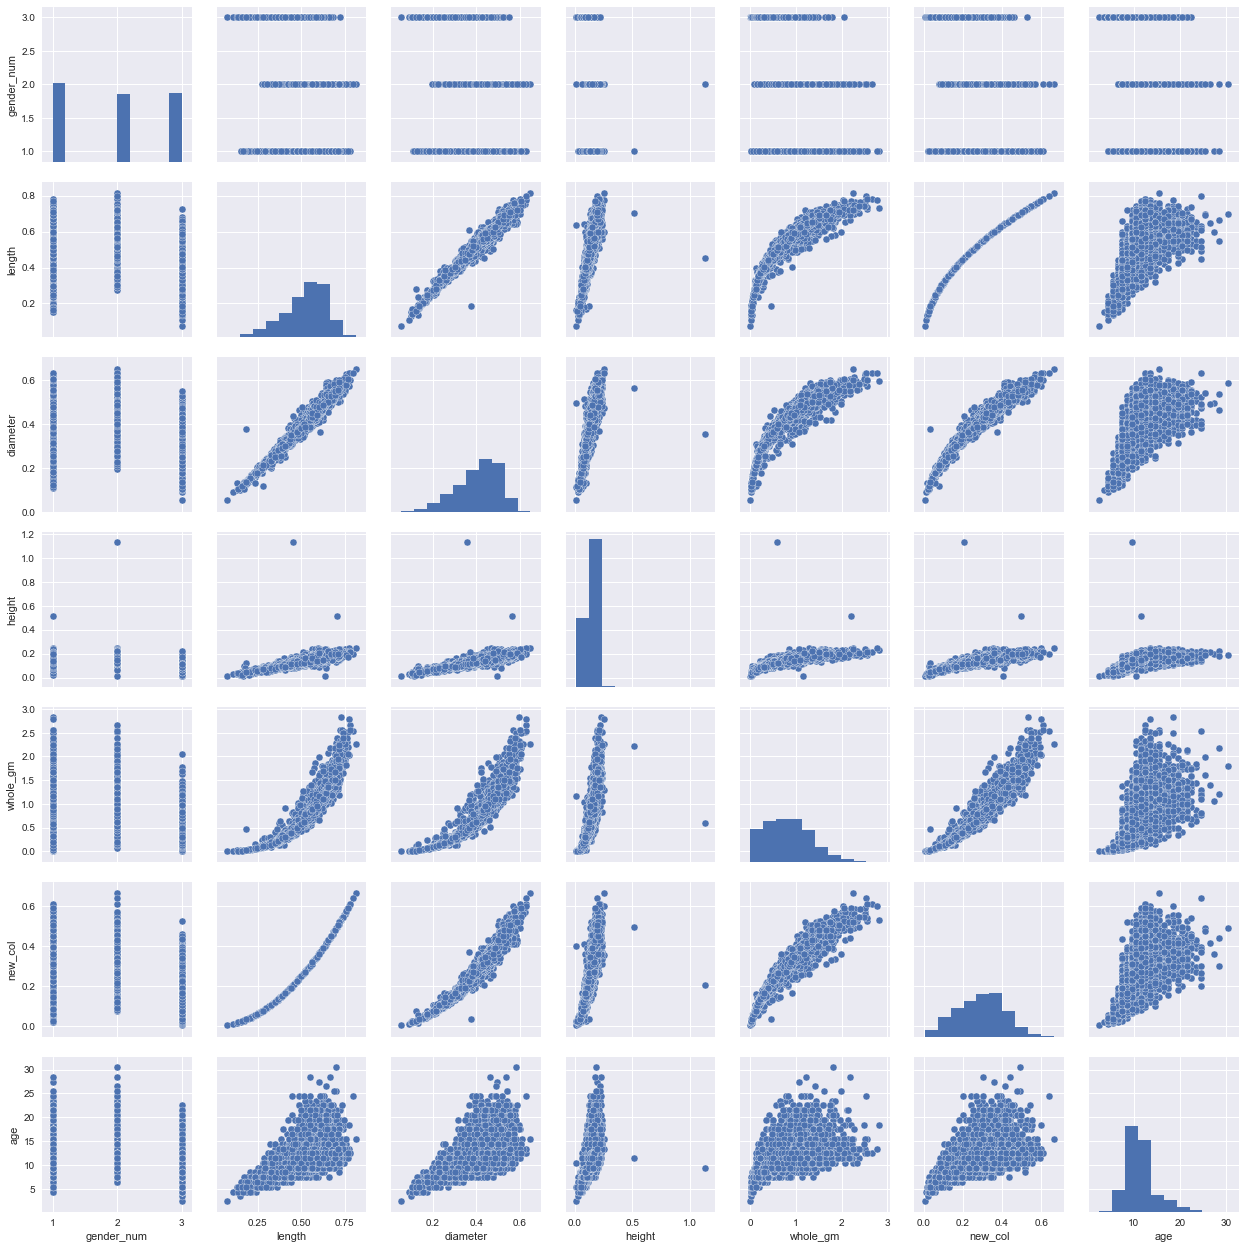

In [204]:
# plot out data to find anything interesting
sns.pairplot(data=abalone_df[['gender_num','length', 'diameter', 'height', 'whole_gm','new_col','age']])

In [205]:
abalone_df.head()

,gender,length,diameter,height,whole_gm,shucked_gm,viscera_gm,shell_gm,rings,gender_num,age,new_col
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,16.5,0.207025
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,8.5,0.122500
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2.0,10.5,0.280900
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,11.5,0.193600
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3.0,8.5,0.108900


In [206]:
# Play with dropping rows in gender.  Not sure this is a good idea
#ab1_df = abalone_df.drop(abalone_df.query('gender_num != 1.0'),axis=1)

#ab1_df.head()

In [207]:
ab2_df = abalone_df.drop(['gender','rings'], axis=1)

drop_str = []
best_score = 0

# Try all the permutations of columns
for i,j,k,l,m,n,o,p,q,r in itertools.combinations(ab2_df, 10):
    for loop in range(0,10):
        drop_str.append('age')
        if  loop < 0:
            drop_str.append(i)
        if loop < 1:
            drop_str.append(j)
        if loop < 2:
            drop_str.append(k)
        if loop < 3:
            drop_str.append(l)
        if loop < 4:
            drop_str.append(m)
        if loop < 5:
            drop_str.append(n)
        if loop < 6:
            drop_str.append(o)
        if loop < 7:
            drop_str.append(p)
        if loop < 8:
            drop_str.append(q)
        if loop < 8:
            drop_str.append(r)
           
        X = ab2_df.drop(drop_str, axis=1).values     # Take cols out of the X values
        y = ab2_df['age'].values                # age will be our y values
        linear_model = LinearRegression()
        trials = 100
        score = 0

        for i in range(trials):
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            linear_model.fit(X_train, y_train)
            score += linear_model.score(X_test, y_test)
    
        current_score = score/trials
        if current_score > best_score:
            print(drop_str,current_score)
            best_score = current_score
        print(drop_str,best_score)
        drop_str = []

['age', 'diameter', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.306189691197
['age', 'diameter', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.306189691197
['age', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.332557858395
['age', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.332557858395
['age', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.332557858395
['age', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.334970437964
['age', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.334970437964
['age', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.500876963343
['age', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.500876963343
['age', 'shell_gm', 'gender_num', 'age', 'new_col

In [209]:
# Try Ridge regression
from sklearn import linear_model

ab2_df = abalone_df.drop(['gender','rings'], axis=1)

drop_str = []
best_score = 0

# Try all the permutations of columns
for i,j,k,l,m,n,o,p,q,r in itertools.combinations(ab2_df, 10):
    for loop in range(0,10):
        drop_str.append('age')
        if  loop < 0:
            drop_str.append(i)
        if loop < 1:
            drop_str.append(j)
        if loop < 2:
            drop_str.append(k)
        if loop < 3:
            drop_str.append(l)
        if loop < 4:
            drop_str.append(m)
        if loop < 5:
            drop_str.append(n)
        if loop < 6:
            drop_str.append(o)
        if loop < 7:
            drop_str.append(p)
        if loop < 8:
            drop_str.append(q)
        if loop < 8:
            drop_str.append(r)
           
        X = ab2_df.drop(drop_str, axis=1).values     # Take cols out of the X values
        y = ab2_df['age'].values                # age will be our y values
        reg = linear_model.Ridge(alpha = .5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)
        trials = 100
        score = 0

        for i in range(trials):
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            reg.fit(X_train, y_train)
            score += reg.score(X_test, y_test)
    
        current_score = score/trials
        if current_score > best_score:
            print(drop_str,current_score)
            best_score = current_score
        print(drop_str,current_score)
        drop_str = []



['age', 'diameter', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.307033123939
['age', 'diameter', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.307033123939
['age', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.326721774849
['age', 'height', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.326721774849
['age', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.340688084702
['age', 'whole_gm', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.340688084702
['age', 'shucked_gm', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.336736410062
['age', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.505431678021
['age', 'viscera_gm', 'shell_gm', 'gender_num', 'age', 'new_col'] 0.505431678021
['age', 'shell_gm', 'gender_num', 'ag